# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('C:/Users/79192/DL/hw_compet_kaggle/train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [6]:
data.shape

(5282, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [8]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2310,72,25.00,1849.2,Female,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2172,1,69.65,69.65,Female,0,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
812,39,90.70,3413.25,Male,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,0
3229,70,19.55,1462.05,Female,1,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),0
500,65,105.50,6985.65,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1


#### Мини-анализ
 'ClientPeriod' (int64), 'MonthlySpending' (float64), 'TotalSpent' (**object** - надо менять) - числовые признаки, остальные - категориальные (в них с булевским типом отнесу, IsSeniorCitizen - int64 - далее продумаю, нужно ли модифицировать). 

In [9]:
## перевод в числовой тип
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')
##нашли "пробой" в данных, заменим пустоту на nan с помощью errors='coerce'

In [10]:
##странно: nan не показал, а он есть 
display(data.iloc[1048])

ClientPeriod                                  0
MonthlySpending                           25.75
TotalSpent                                  NaN
Sex                                        Male
IsSeniorCitizen                               0
HasPartner                                  Yes
HasChild                                    Yes
HasPhoneService                             Yes
HasMultiplePhoneNumbers                     Yes
HasInternetService                           No
HasOnlineSecurityService    No internet service
HasOnlineBackup             No internet service
HasDeviceProtection         No internet service
HasTechSupportAccess        No internet service
HasOnlineTV                 No internet service
HasMovieSubscription        No internet service
HasContractPhone                       Two year
IsBillingPaperless                           No
PaymentMethod                      Mailed check
Churn                                         0
Name: 1048, dtype: object

In [11]:
##После замены на nan
display(data.iloc[1048])

ClientPeriod                                  0
MonthlySpending                           25.75
TotalSpent                                  NaN
Sex                                        Male
IsSeniorCitizen                               0
HasPartner                                  Yes
HasChild                                    Yes
HasPhoneService                             Yes
HasMultiplePhoneNumbers                     Yes
HasInternetService                           No
HasOnlineSecurityService    No internet service
HasOnlineBackup             No internet service
HasDeviceProtection         No internet service
HasTechSupportAccess        No internet service
HasOnlineTV                 No internet service
HasMovieSubscription        No internet service
HasContractPhone                       Two year
IsBillingPaperless                           No
PaymentMethod                      Mailed check
Churn                                         0
Name: 1048, dtype: object

In [12]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

#### "А вот и гаврики нашлись" (иу1 by Филимонов Н.Б.)
9 нанов в TotalSpent... Надо с ними что-то сделать

In [13]:
data[data.TotalSpent.isna()] ##а выглядят они так

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


###### чуть выводов
Итак, их ClientPeriod по нулям => новые клиенты(покупатели), в остальных данных MonthlySpending == TotalSpent, если ClientPeriod = 1 //что вполне логично, Первый период соответствует единичной оплате, дальше уже будет суммирование. Можно поставить 0 в Значение TotalSpent, поскольку неизвестно - успел ли оплатить клиент за услуги или это лишь предзаказ. А наперед загадывать и приравнивать к MonthlySpending не хочется, тк немного внесу новой "придуманной" информации, которая может доп. "зашумление" ввести в оригинальную логику.

In [14]:
data.TotalSpent.where(data.TotalSpent > 0, 0, inplace=True)

In [15]:
display(data.iloc[1048])

ClientPeriod                                  0
MonthlySpending                           25.75
TotalSpent                                  0.0
Sex                                        Male
IsSeniorCitizen                               0
HasPartner                                  Yes
HasChild                                    Yes
HasPhoneService                             Yes
HasMultiplePhoneNumbers                     Yes
HasInternetService                           No
HasOnlineSecurityService    No internet service
HasOnlineBackup             No internet service
HasDeviceProtection         No internet service
HasTechSupportAccess        No internet service
HasOnlineTV                 No internet service
HasMovieSubscription        No internet service
HasContractPhone                       Two year
IsBillingPaperless                           No
PaymentMethod                      Mailed check
Churn                                         0
Name: 1048, dtype: object

In [16]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161,0.159409,0.262022
std,24.550326,30.176464,2269.049195,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


In [17]:
data[data.TotalSpent.isna()] ##больше нанов нет

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn


In [18]:
##поищем дубликаты данных и удалим по необходимости 

data.duplicated().sum()

14

In [19]:
print(data.shape)
data = data.drop_duplicates().reset_index(drop=True)

(5282, 20)


In [20]:
print(data.shape)
print(len(data))
razm = len(data)

(5268, 20)
5268


1. data.drop_duplicates(): Этот метод удаляет все дубликаты из DataFrame data. Если у вас есть несколько строк, у которых значения во всех столбцах совпадают с другими строками, то они будут считаться дубликатами. По умолчанию этот метод сохраняет первое вхождение уникальной строки и удаляет все последующие вхождения.

2. .reset_index(drop=True): После удаления дубликатов, этот вызов метода сбрасывает индекс DataFrame и создает новый числовой индекс, начиная с 0. Параметр drop=True означает, что предыдущий индекс будет отброшен. Это полезно, когда вы хотите избавиться от старых индексов после операций, вносящих изменения в структуру DataFrame.

У этой функции также есть другие параметры, которые могут быть полезны в различных сценариях. Некоторые из них включают keep, subset и inplace.

- keep: Этот параметр позволяет настроить, какие дубликаты следует сохранить. Например, если у вас есть несколько дубликатов, можно указать keep='first' (по умолчанию) для сохранения первого вхождения, или keep='last' для сохранения последнего.
  
- subset: Этот параметр позволяет определить подмножество столбцов, по которым нужно проверить наличие дубликатов. Например, subset=['column1', 'column2'] проверит дубликаты только в указанных столбцах.

- inplace: Этот параметр, если установлен в True, позволяет выполнить операции с местным изменением DataFrame, не возвращая новый DataFrame. В вашем случае, вы использовали inplace=True, чтобы применить изменения к исходному DataFrame data.

Таким образом, код data = data.drop_duplicates().reset_index(drop=True) удаляет дубликаты из data и сбрасывает индекс с сохранением изменений в data самом.

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [21]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [22]:
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.20,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.40,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.70,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.80,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


#### мини-анализ
Нет nan'ов, поэтому и заменять их нет необходимости))

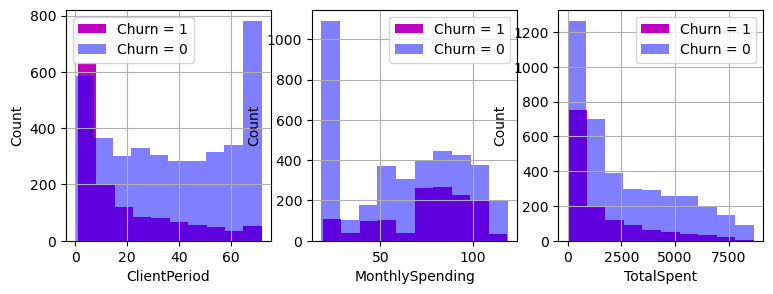

In [23]:
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(1,3,figsize=(9,3))
churn_1 = data[data.Churn == 1]
churn_0 = data[data.Churn == 0]

for ind, chisl_feature in enumerate(num_cols):
    axs[ind].hist(churn_1[chisl_feature], bins=10, alpha=1, label="Churn = 1", color='m')
    axs[ind].hist(churn_0[chisl_feature], bins=10, alpha=0.5, label="Churn = 0", color='b')
    axs[ind].grid(True)
    axs[ind].grid(True, which='minor')
    axs[ind].legend()
    axs[ind].set_xlabel(chisl_feature)
    axs[ind].set_ylabel("Count")

plt.show()

In [24]:
## теперь попробуем seaborn

import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
# векторная графика, более четкая
import warnings
warnings.simplefilter('ignore')

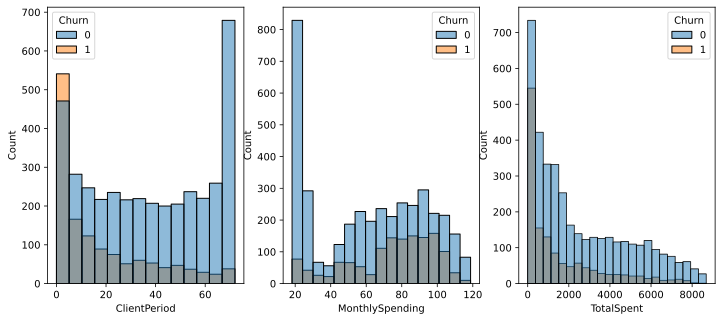

In [25]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 5)) 

for idx, feat in enumerate(num_cols):
    sns.histplot(data, x=feat, hue='Churn', ax=axes[idx]);

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [26]:
# отключим предупреждения Anaconda ###жуть-жутейская, не повторять боле
#import warnings
#warnings.simplefilter('ignore')
#for idx, feat in enumerate(num_cols):
    #sns.catplot(data, x=feat, y='Churn', kind="violin", bw_adjust=.5, cut=0, split=True,ax=axes[idx])

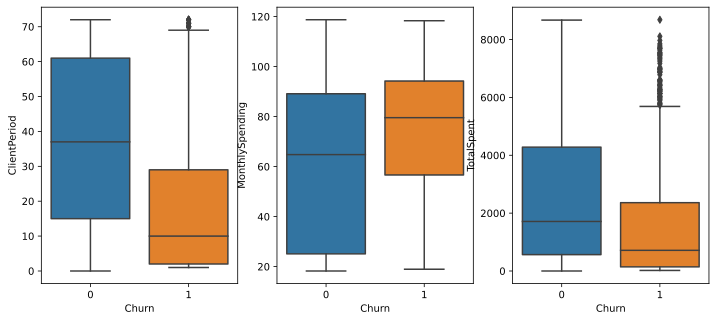

In [27]:
# боксплоты
fig, axes = plt.subplots(ncols=3, figsize=(12, 5)) 

for idx, feat in enumerate(num_cols):
    sns.boxplot(x='Churn', y=feat, data=data, ax=axes[idx])
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(feat);

In [28]:
#выводы 
#- больше всего вероятность оттока у новых пользователей и у тех, у кого 
#высокая ежемесечная оплата. 
#Если в совокуплении - то почти наверняка клиент уходит в отток 
## upd - по матрице корреляции те же выводы - минус 0.35 для периода пользования, то есть чем меньше 
# клиент принимает услуги компании, тем выше вероятность оттока

<Axes: >

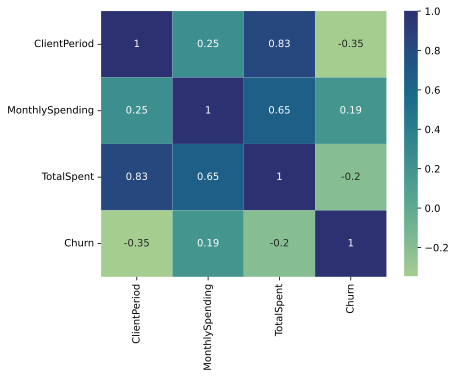

In [29]:
corr_matrix = data[num_cols + ['Churn']].corr()
sns.heatmap(corr_matrix, annot = True, cmap="crest") #показывает численное значение корреляции

In [30]:
#Для категориальных посчитайте количество каждого значения для каждого признака. 
#Для каждой колонки надо сделать data.value_counts()
for cat in cat_cols:
    print(cat)
    print(data[cat].value_counts())
    print('\n')

Sex
Sex
Male      2647
Female    2621
Name: count, dtype: int64


IsSeniorCitizen
IsSeniorCitizen
0    4427
1     841
Name: count, dtype: int64


HasPartner
HasPartner
No     2691
Yes    2577
Name: count, dtype: int64


HasChild
HasChild
No     3662
Yes    1606
Name: count, dtype: int64


HasPhoneService
HasPhoneService
Yes    4747
No      521
Name: count, dtype: int64


HasMultiplePhoneNumbers
HasMultiplePhoneNumbers
No                  2497
Yes                 2250
No phone service     521
Name: count, dtype: int64


HasInternetService
HasInternetService
Fiber optic    2335
DSL            1798
No             1135
Name: count, dtype: int64


HasOnlineSecurityService
HasOnlineSecurityService
No                     2604
Yes                    1529
No internet service    1135
Name: count, dtype: int64


HasOnlineBackup
HasOnlineBackup
No                     2324
Yes                    1809
No internet service    1135
Name: count, dtype: int64


HasDeviceProtection
HasDeviceProtection
No 

In [31]:
##у нас 6 булевых (бинарных) категориальных признаков 
bin_cols = [    
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless'
]
without_bin_cat = list(set(cat_cols)-set(bin_cols))
print(cat_cols)
print(data['Churn'].value_counts())
s_target = cat_cols.copy()
s_target.append("Churn")
print(s_target)

['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']
Churn
0    3894
1    1374
Name: count, dtype: int64
['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod', 'Churn']


In [32]:
#data.Churn.where(data.Churn != "Nan", data.Churn.astype('object'), inplace=True)
#data.Churn = data.Churn.astype('object') 
#data["Churn"] = data["Churn"].astype('object')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [33]:
print(data["Churn"].value_counts())

Churn
0    3894
1    1374
Name: count, dtype: int64


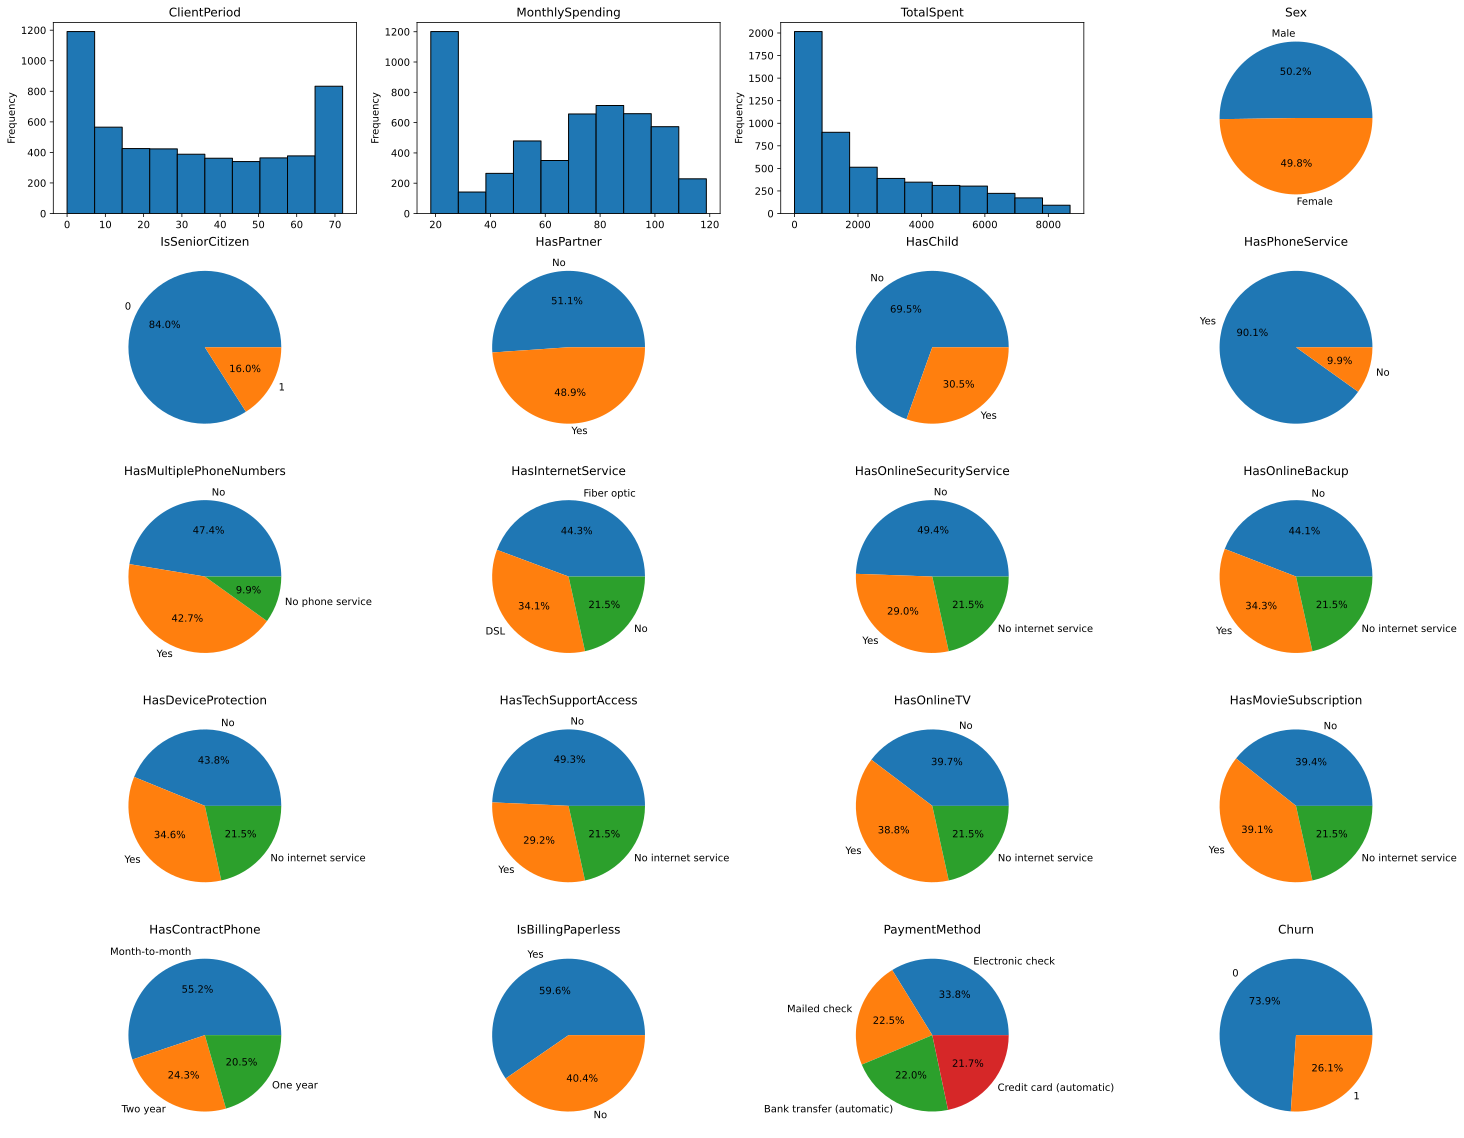

In [34]:
fig, axes = plt.subplots(5, 4, figsize=(25,20))
for ax, col in zip(axes.flatten(), data.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        ax.pie(data[col].value_counts(), autopct="%1.1f%%", labels = data[col].value_counts().index)
    else:
        data[col].plot(kind='hist', ec='black', ax=ax)

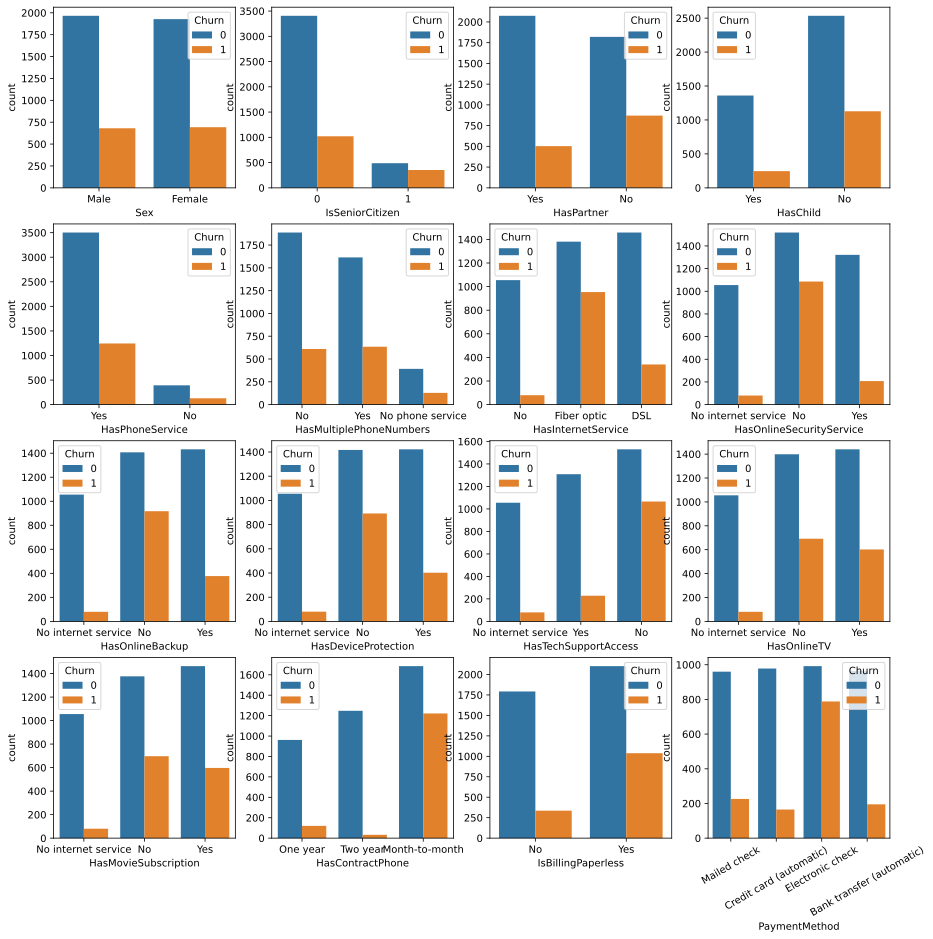

In [35]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for idx, feat in enumerate(cat_cols):
    sns.countplot(x=feat, hue='Churn', data=data, ax=axes[idx // 4, idx % 4])
    if idx == 15:
        axes[idx // 4, idx % 4].tick_params(axis='x', labelrotation=30); 

Во-первых есть избыточные данные(антонимиальные наподобие есть и нет интернет/телефон сервисов. такие штуки надо объединить)
+есть несбалансированные данные (HasPhoneService) :
таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [36]:
data.HasPhoneService.value_counts()

HasPhoneService
Yes    4747
No      521
Name: count, dtype: int64

In [37]:
rat = 4747//521
rat

9

присоединим к данным класса "yes" в hasphoneservice продублированный класс 1 и перемещаем 
####  **метод unsampling**

In [38]:
df_1 = data.loc[data['HasPhoneService'] == 'Yes']
df_1

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5261,21,19.95,416.40,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,0
5262,72,98.20,7015.90,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
5265,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5266,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [39]:
df_2 = data.loc[data['HasPhoneService'] == 'No']
df_2

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
13,26,38.85,1025.15,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),0
23,48,45.30,2145.00,Female,0,Yes,No,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),1
30,21,26.05,565.75,Male,0,Yes,Yes,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
50,3,29.75,96.85,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,37,35.80,1316.90,Male,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,No,Two year,No,Credit card (automatic),0
5205,66,54.65,3632.00,Male,0,Yes,Yes,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
5210,71,47.60,3377.80,Female,0,Yes,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
5263,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0


In [40]:
len(df_2)

521

In [41]:
df_2 = df_2.loc[df_2.index.repeat(rat-1)]

In [42]:
len(df_2)

4168

прежде чем продублировать данные, посмотрим, как созданный df_2 может повлиять на остальные данные

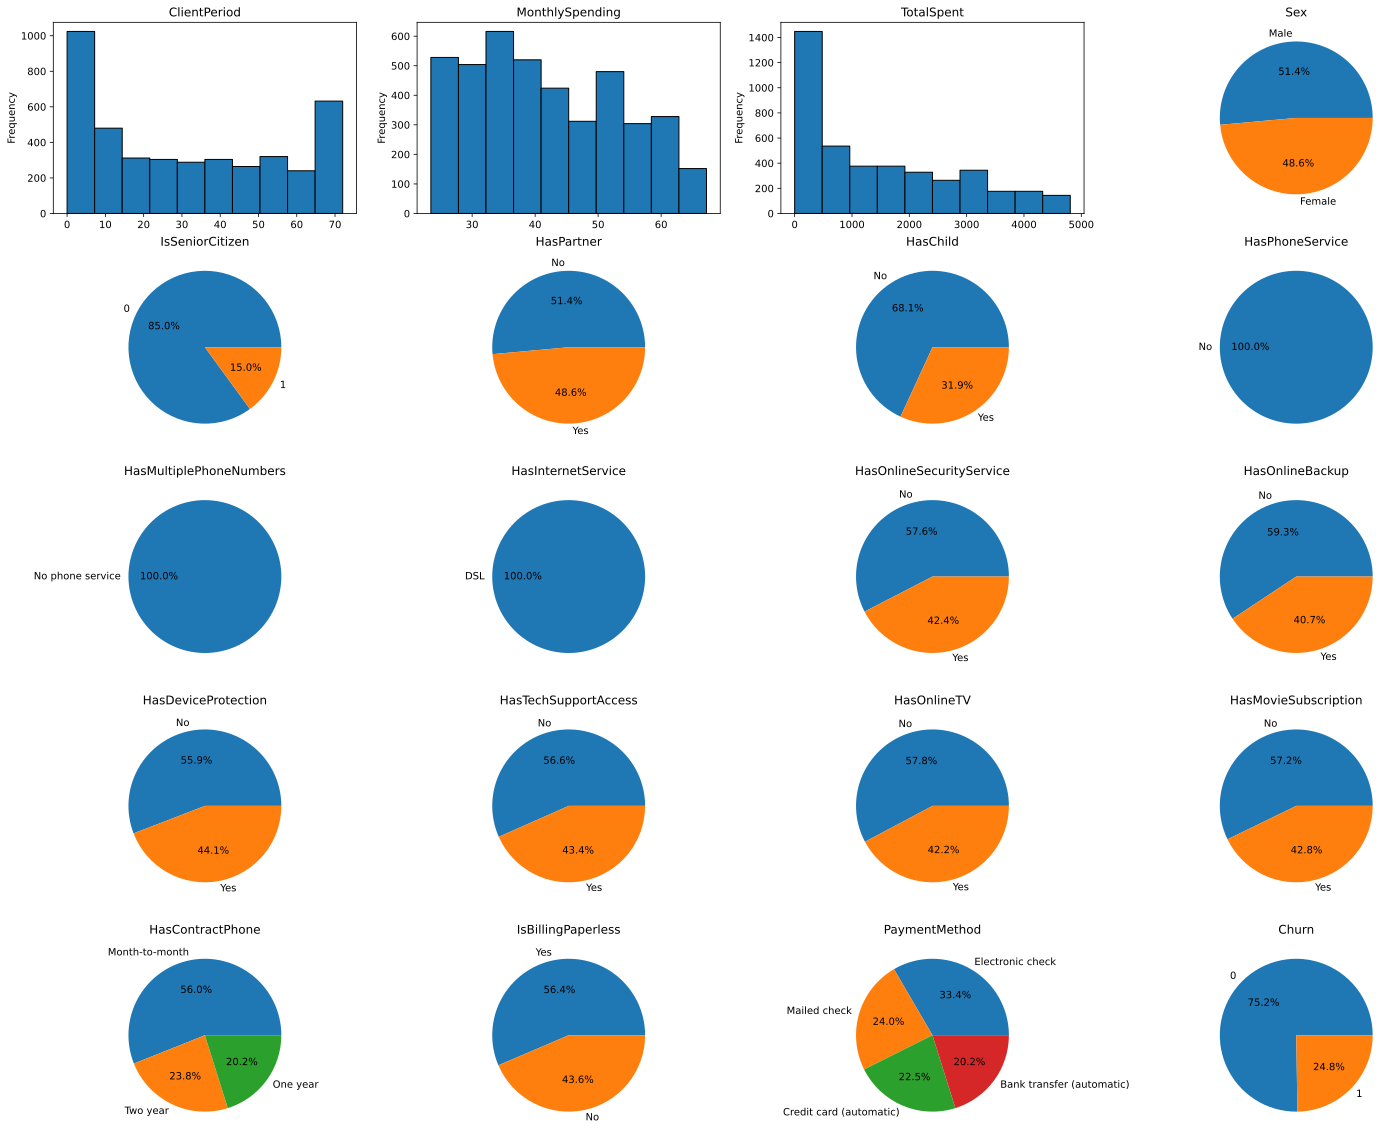

In [43]:
#df_2.hist(ax=axes.flatten(), bins=10, color='steelblue', edgecolor='black', linewidth=1.0, grid=False)
#for ax, col in zip(axes.flatten(), data.columns):
#    ax.set_title(col)
#plt.figure(figsize=(10, 6))
#for column in df_2.columns:
 #   sns.histplot(df_2[column], kde=False, bins=10, label=column)
#plt.legend()
#plt.show()
fig, axes = plt.subplots(5, 4, figsize=(25,20))
for ax, col in zip(axes.flatten(), df_2.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        ax.pie(df_2[col].value_counts(), autopct="%1.1f%%", labels = df_2[col].value_counts().index)
    else:
        df_2[col].plot(kind='hist', ec='black', ax=ax)

Анализ этих данных показывает, что добавление df_2 к дата пагубно повлияет на результаты обучения, поскольку мы заглушим данные других признаков, лучше оставить без изменения data.
Также можем сделать вывод, что вероятность оттока клиентов, у которых нет телефонного обслуживания составляет 75%

In [44]:
#посмотрим закономерности данных
tmp = data.groupby("PaymentMethod", as_index = False).agg({"Churn": ['sum', 'count']})
## Параметр as_index в методе groupby() отвечает за то, будет ли использоваться столбец, 
# по которому производится группировка, как индекс в результирующем объекте DataFrame. Если as_index=True, 
# то этот столбец будет использоваться в качестве индекса, если as_index=False, то индекс будет сгенерирован автоматически.
tmp["Churn (%)"] = 100 * tmp["Churn", 'sum'] / tmp["Churn",'count']
tmp.sort_values('Churn (%)').reset_index(drop=True)
tmp

PaymentMethod Churn        Churn (%)
                               sum count           
0  Bank transfer (automatic)   195  1159  16.824849
1    Credit card (automatic)   165  1143  14.435696
2           Electronic check   788  1780  44.269663
3               Mailed check   226  1186  19.055649

Вывод-с: Электронная оплата преобладает

In [45]:
tmp = data.groupby("HasContractPhone", as_index=False).agg({"Churn":['sum', 'count']})
tmp['Churn (%)'] = 100 * tmp['Churn', 'sum'] / tmp['Churn', 'count']
tmp.sort_values('Churn (%)').reset_index(drop=True)
tmp

HasContractPhone Churn        Churn (%)
                     sum count           
0   Month-to-month  1221  2906  42.016518
1         One year   120  1082  11.090573
2         Two year    33  1280   2.578125

In [46]:
tmp.sort_values("Churn (%)").reset_index(drop = True)

HasContractPhone Churn        Churn (%)
                     sum count           
0         Two year    33  1280   2.578125
1         One year   120  1082  11.090573
2   Month-to-month  1221  2906  42.016518

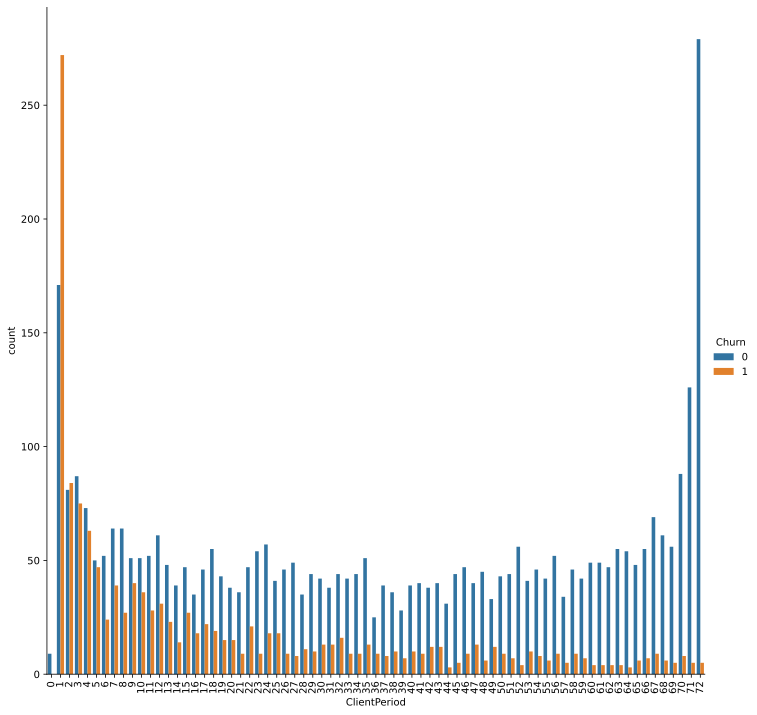

In [47]:
sns.catplot(data=data, x = 'ClientPeriod', hue = "Churn", kind='count', height=10)
plt.xticks(rotation=90);

вывод о длительности периода подтверждён


Параметр aspect в функции catplot задает соотношение размеров осей по горизонтали и вертикали. Например, aspect=2 означает, что горизонтальная ось будет в два раза длиннее вертикальной, а aspect=0.5 значит, что вертикальная ось будет в два раза длиннее горизонтальной. В нашем случае, aspect=20/8 указывает на соотношение размеров осей в 20 к 8.

Наиболее подвержены оттоку пользователи с краткосрочными телефонными контрактами

In [48]:
#fig=plt.figure(figsize=(5, 5))
print(data.Churn.mean())

#sns.countplot(data.Churn);
data.Churn.value_counts()

0.2608200455580866


Churn
0    3894
1    1374
Name: count, dtype: int64

In [49]:
#sns.boxplot(data.Churn)

In [50]:
patterns = {
    "No": 0,
    "No internet service": 0,
    "No phone service": 0,
    "Yes": 1,
    "Male": 0,
    "Female": 1,
    "DSL": 1,
    "Fiber optic": 2,
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2,
    "Credit card (automatic)": 0,
    "Bank transfer (automatic)": 1,
    "Mailed check": 2,
    "Electronic check": 3
}
X_train = data.replace(patterns).drop(target_col, axis=1)
y_train = data[target_col]


<Axes: >

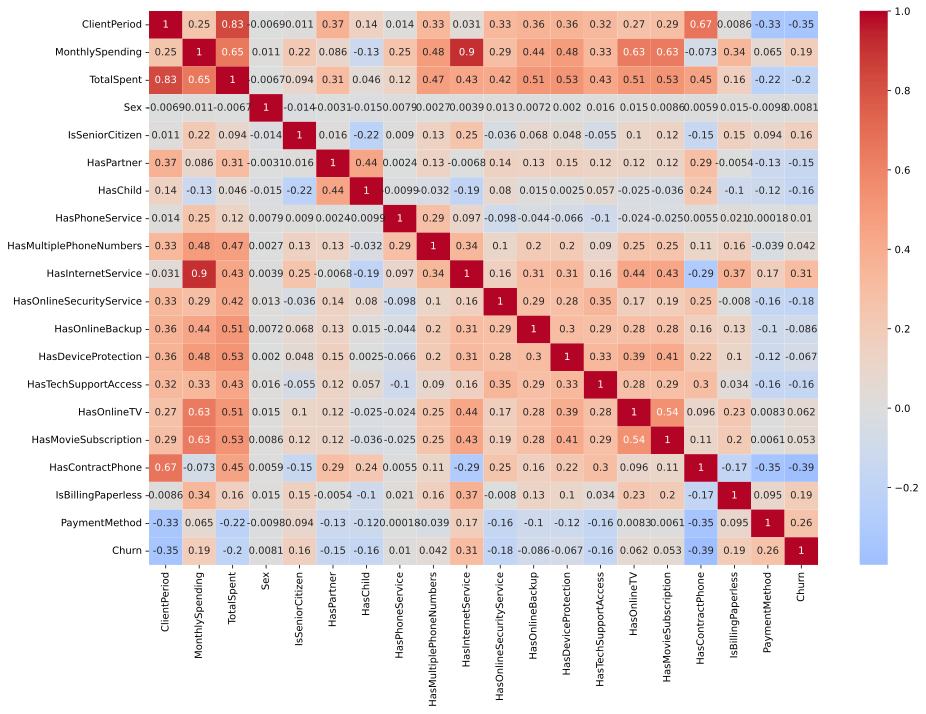

In [51]:
sns.heatmap(data=pd.concat([X_train, y_train], axis=1).corr(), annot = True,
            cmap = 'coolwarm', center = 0, ax = plt.subplots(figsize=(15,10))[1])
#annot отвечает за отображение на карте значений корреляции

**Основные цели PCA заключаются в следующем:**
**PCA** – это независимый метод, который можно использовать для сокращения пространства атрибутов с большего количества переменных набора до меньшего количества факторов

Это метод уменьшения размера, но без гарантии, что размер будет интерпретируемым

В **PCA** основная работа заключается в выборе подмножества переменных из большего набора, в зависимости от того, какие исходные переменные будут иметь наибольшую корреляцию с основной суммой

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

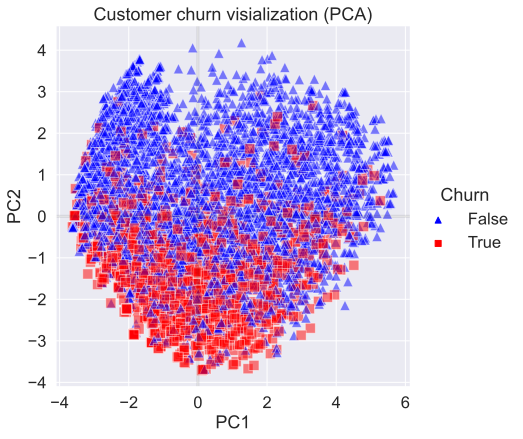

In [53]:

X_train_std = StandardScaler().fit_transform(X_train)
pca = PCA()
pca = PCA(n_components=2)
pca.fit(X_train_std)
x0, x1 = pca.components_
sns.set(font_scale=1.5)
y = data["Churn"].map({0: False, 1: True})
fig = sns.pairplot(data=pd.concat([pd.DataFrame(data=X_train_std @ np.stack([x0, x1]).T, columns=["PC1", "PC2"]), y], axis=1),
                   x_vars="PC1",
                   y_vars="PC2",
                   hue="Churn",
                   markers=('^', 's'),
                   palette=["blue", "red"],
                   plot_kws={'s': 100, 'alpha': 0.5},
                   height=6)
fig.set(title="Customer churn visialization (PCA)")
fig.axes[0][0].axhline(y=0, color='black', lw=3, alpha=0.1)
fig.axes[0][0].axvline(x=0, color='black', lw=3, alpha=0.1);


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [54]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

Создадим пайплайн обработки данных, чтобы применять его на кросс-валидации. Он будет скалировать числовые данные, бинарные данные переведет в 0 и 1, а для категориальных данных сделает OneHot-кодирование. Поскольку пайплайн будет использоваться на кросс-валидации, то он не будет скалировать числовые признаки сразу на всех данных, а будет обучать скалер сначала на трейн-данных, а потом применять его и к трейн-, и к тест-части, чтобы в трейне не было никакой информации о тестовых данных.

In [55]:
preprocessing_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('bin', OneHotEncoder(drop = 'first'), bin_cols),
    ('cat', OneHotEncoder(), without_bin_cat)
])

In [56]:
names = data.columns
X = data[names[:-1]]
y = data[names[-1]]

In [57]:
prep_data = preprocessing_pipeline.fit_transform(X)
len(prep_data[0])

40

In [58]:
# Вариант с LogisticRegressionCV
# stratify = y необходимо, тк целевая функция несбалансирована и в одной из выборок может возникнуть
# отсутствие одного из признаков целевой функции
# random_state = 42 из автостопом по галактике - забавный факт
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, train_size = 0.8,
                                                   random_state = 42)

In [59]:
log_reg = make_pipeline(preprocessing_pipeline, 
                        LogisticRegressionCV(class_weight = 'balanced',
                        scoring = 'roc_auc', refit = True))
log_reg.fit(X_train, y_train)
prediction = log_reg.predict(X_test)
roc_auc_score(y_test, prediction)

0.7664955070603338

In [60]:
log_reg.get_params()['logisticregressioncv__Cs']

10

In [62]:
# Вариант с кросс-валидацией - переберем побольше параметров
# Количество заданий для параллельного выполнения - n_jobs = -1 (все ядра процессора задействованы)
# verbose - Управляет подробностью: чем выше, тем больше сообщений.
#> 1: отображается время вычисления для каждого сгиба и параметра-кандидата;
#> 2: также отображается оценка;
#>3 : индексы параметров fold и candidate также отображаются вместе со временем начала вычисления.
log_reg = make_pipeline(preprocessing_pipeline, LogisticRegression(class_weight='balanced'))
param = {'logisticregression__penalty': ['l1'],  #['l1', 'l2', 'elasticnet']
        'logisticregression__C':[10], #[0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'logisticregression__solver':['saga'], 
         #['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'logisticregression__max_iter':[500],
         #[15, 50, 100, 150, 200, 300, 400, 500],
        'logisticregression__l1_ratio':[0.2]}
#[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
grid = GridSearchCV(estimator=log_reg, param_grid = param, cv = 5, scoring = 'roc_auc', n_jobs = -1,
                   verbose = 3)
grid.fit(X, y)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('bin',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'IsBillingPaperless']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['HasInternetService',
                                                                          'PaymentMe...
                                                                          'HasOnlineSecurityService',
                                                                          'HasContractPhone',
                                                                          'HasDeviceProtection'])])),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [10],
                         'logisticregression__l1_ratio': [0.2],
                         'logisticregression__max_iter': [500],
                         'logisticregression__penalty': ['l1'],
                         'logisticregression__solver': ['saga']},
             scoring='roc_auc', verbose=3)

In [63]:
grid.best_score_

0.8443016133369461

In [64]:
grid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('bin',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'IsBillingPaperless']),
                                                 ('cat', OneHotEncoder(),
                                                  ['HasInternetService',
                                                   'PaymentMethod',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasOnlineBackup',
                                                   'HasOnlineSecurityService',
                                                   'HasContractPhone',
                                                   'HasDeviceProtection'])])),
                ('logisticregression',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.2,
                                    max_iter=500, penalty='l1',
                                    solver='saga'))])

In [67]:
#До применения бустингов попробуем также другие модели - 
#случайный лес, к-ближайших соседей, метод опорных векторов.
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [68]:
# СЛУЧАЙНЫЙ ЛЕС

random_forest = make_pipeline(preprocessing_pipeline, 
                              RandomForestClassifier(class_weight = 'balanced'))
random_forest_scoring = cross_validate(random_forest, X, y, scoring = 'roc_auc', cv = 10)
print(random_forest_scoring['test_score'].mean())

0.8176760404780195


In [69]:
random_forest = make_pipeline(preprocessing_pipeline, 
                              RandomForestClassifier(class_weight = 'balanced'))
parameters = {'randomforestclassifier__n_estimators':[400], 
              #[5,10,15,20,30,50,100,150, 200, 300, 400],
             'randomforestclassifier__criterion':['entropy'],#['gini', 'entropy'],
             'randomforestclassifier__max_features':['auto', 'sqrt', 'log2']}

In [70]:
grid_RF = GridSearchCV(estimator=random_forest, 
                        param_grid=parameters,
                        cv=10, 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10)
grid_RF.fit(X, y)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('bin',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'IsBillingPaperless']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['HasInternetService',
                                                                          'PaymentM...
                                                                          'HasOnlineSecurityService',
                                                                          'HasContractPhone',
                                                                          'HasDeviceProtection'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['entropy'],
                         'randomforestclassifier__max_features': ['auto',
                                                                  'sqrt',
                                                                  'log2'],
                         'randomforestclassifier__n_estimators': [400]},
             scoring='roc_auc', verbose=10)

In [71]:
grid_RF.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('bin',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'IsBillingPaperless']),
                                                 ('cat', OneHotEncoder(),
                                                  ['HasInternetService',
                                                   'PaymentMethod',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasOnlineBackup',
                                                   'HasOnlineSecurityService',
                                                   'HasContractPhone',
                                                   'HasDeviceProtection'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy',
                                        n_estimators=400))])

In [72]:
random_forest = make_pipeline(preprocessing_pipeline, 
                              RandomForestClassifier(class_weight = 'balanced'))
parameters = {'randomforestclassifier__n_estimators':[300, 350, 400,450, 500],
             'randomforestclassifier__criterion':['gini', 'entropy'],
             'randomforestclassifier__max_features':['auto']}
grid_RF = GridSearchCV(estimator=random_forest, 
                        param_grid=parameters,
                        cv=10, 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10)
grid_RF.fit(X, y)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
83 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\79192\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\79192\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\79192\AppData\Roaming\Python\Python311\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\79192\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\79192\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\79192\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\79192\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\79192\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\79192\AppData\Roaming\Python\Python311\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\79192\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\79192\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\79192\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


In [ ]:
grid_RF.best_estimator_

In [ ]:
grid_RF.best_score_

In [ ]:
# К БЛИЖАЙШИХ СОСЕДЕЙ
KNN = make_pipeline(preprocessing_pipeline, KNeighborsClassifier(weights = 'distance'))

KNN_scoring = cross_validate(KNN, X, y, scoring = 'roc_auc', cv=5)
print(KNN_scoring['test_score'].mean())


In [73]:
KNN= make_pipeline(
    preprocessing_pipeline,
    KNeighborsClassifier(weights='distance')
)

parameters = {'kneighborsclassifier__n_neighbors':[50],#[20, 30, 50],
             'kneighborsclassifier__algorithm':['kd_tree'],
              #['auto', 'ball_tree', 'kd_tree', 'brute'],
             'kneighborsclassifier__metric':['euclidean']}
#['euclidean', 'manhattan', 'chebyshev', 'minkowski']


CV_KN_model = GridSearchCV(estimator=KNN, 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10)

CV_KN_model.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('bin',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'IsBillingPaperless']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['HasInternetService',
                                                                          'PaymentMe...
                                                                          'HasMovieSubscription',
                                                                          'HasOnlineBackup',
                                                                          'HasOnlineSecurityService',
                                                                          'HasContractPhone',
                                                                          'HasDeviceProtection'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(weights='distance'))]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__algorithm': ['kd_tree'],
                         'kneighborsclassifier__metric': ['euclidean'],
                         'kneighborsclassifier__n_neighbors': [50]},
             scoring='roc_auc', verbose=10)

In [74]:
CV_KN_model.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('bin',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'IsBillingPaperless']),
                                                 ('cat', OneHotEncoder(),
                                                  ['HasInternetService',
                                                   'PaymentMethod',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasOnlineBackup',
                                                   'HasOnlineSecurityService',
                                                   'HasContractPhone',
                                                   'HasDeviceProtection'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='kd_tree', metric='euclidean',
                                      n_neighbors=50, weights='distance'))])

In [75]:
CV_KN_model.best_score_

0.8225721975832156

С очень большим увеличением n_neighbors=50 растет показатель качества. Но при этом велика вероятность, что модель уже переобучилась

In [76]:
# МЕТОД ОПОРНЫХ ВЕКТОРОВ
SVC_model = make_pipeline(
    preprocessing_pipeline,
    SVC(class_weight='balanced')
)
SVC_scoring = cross_validate(SVC_model, X, y, scoring = 'roc_auc', cv = 5)
print(SVC_scoring['test_score'].mean())

0.8242000173749965


In [77]:
SVC_model = make_pipeline(
    preprocessing_pipeline,
    SVC(class_weight='balanced')
)

parameters = {'svc__C':[10000], #[ 100, 1000, 10000],
             'svc__kernel':['linear'],
              #['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'svc__gamma':['scale', 'auto']}

CV_SVC_model = GridSearchCV(estimator=SVC_model, 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10)

CV_SVC_model.fit(X, y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


KeyboardInterrupt: 

In [ ]:
CV_SVC_model.best_estimator_

In [ ]:
CV_SVC_model.best_score_

In [ ]:
## бэггинг
from sklearn.ensemble import VotingClassifier


estimators = []
m1 = LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.2, max_iter=500, penalty='l1', solver='saga')
estimators.append(('Logistic', m1))
m2 = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=400)
estimators.append(('Random_Forest_Classifier1', m2))
m3 = SVC(C=800, class_weight='balanced', kernel='linear') 
estimators.append(('SVC1', m3))
m4 = SVC(C=1000, class_weight='balanced', kernel='linear') 
estimators.append(('SVC2', m4))

ensemble = VotingClassifier(estimators, voting = 'hard', weights = [0.4, 0.001, 0.2995, 0.2995])
# hard - голосование по правилу большинства, веса в зависимости от точности модели

In [ ]:
#ens_ = make_pipeline(preprocessing_pipeline, KNeighborsClassifier)
#ens_model = cross_validate(ens_, X, y, scoring = 'roc_auc', cv = 5)
#print(ens_model['test_score'].mean()) 

##плохая затея

In [ ]:
roc_auc_list = []

for i in range(5):
    train_data, test_data, train_labels, test_labels = train_test_split(X, y, stratify = y, test_size = 0.3)
    train_data = preprocessing_pipeline.fit_transform(train_data)
    test_data = preprocessing_pipeline.transform(test_data)
    ensemble.fit(train_data, train_labels)
    predicted = ensemble.predict(test_data)
    score = roc_auc_score(test_labels, predicted)
    roc_auc_list.append(score)
    

In [ ]:
roc_auc_list = np.array(roc_auc_list)
print(roc_auc_list.mean())

In [ ]:
estimators = []
m1 = LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.2, max_iter=500, penalty='l1', solver='saga')
estimators.append(('Logistic', m1))
m2 = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=400)
estimators.append(('Random_Forest_Classifier1', m2))
m3 = KNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=50,
                     weights='distance')
estimators.append(('KNeighbors', m3))

ensemble = VotingClassifier(estimators, voting = 'soft', weights = [0.5, 0.4, 0.1])
#soft - прогноз метки класса на основе argmax сумм прогнозируемых вероятностей


In [ ]:
roc_auc_list = []

for i in range(5):
    train_data, test_data, train_labels, test_labels = train_test_split(X, y, stratify = y, test_size = 0.3)
    train_data = preprocessing_pipeline.fit_transform(train_data)
    test_data = preprocessing_pipeline.transform(test_data)
    ensemble.fit(train_data, train_labels)
    predicted = ensemble.predict_proba(test_data)[:, 1]
    score = roc_auc_score(test_labels, predicted)
    roc_auc_list.append(score)
 

In [ ]:
roc_auc_list = np.array(roc_auc_list)
print(roc_auc_list.mean())

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные значения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [78]:
!pip install catboost
from catboost import CatBoostClassifier

Defaulting to user installation because normal site-packages is not writeable


In [80]:
model = CatBoostClassifier(n_estimators=200, cat_features = cat_cols, silent=True)
cat_scoring = cross_validate(model, X, y, scoring = 'roc_auc', cv = 5)
print(cat_scoring['test_score'].mean())

0.8422078611394376



Параметр "silent" в CatBoostClassifier отвечает за вывод информации о процессе обучения модели. Если установить его в значение True, то процесс обучения будет проходить без вывода информации о прогрессе и метриках на каждой итерации. Если установить его в значение False (по умолчанию), то информация о процессе обучения будет выводиться.

In [81]:
grid = {'learning_rate': [0.01, 0.04, 0.08, 0.12, 0.16, 0.2, 0.25, 0.3],
       'n_estimators':[100, 150, 200, 300, 400, 600, 800, 1000]}
cat_mod = CatBoostClassifier(cat_features=cat_cols, silent = True)
cv_cat_model = cat_mod.grid_search(grid, X=X, y=y)


bestTest = 0.4528992176
bestIteration = 99

0:	loss: 0.4528992	best: 0.4528992 (0)	total: 3.55s	remaining: 3m 43s

bestTest = 0.3956870206
bestIteration = 99

1:	loss: 0.3956870	best: 0.3956870 (1)	total: 6.79s	remaining: 3m 30s

bestTest = 0.3958831402
bestIteration = 56

2:	loss: 0.3958831	best: 0.3956870 (1)	total: 9.98s	remaining: 3m 22s

bestTest = 0.3961539062
bestIteration = 44

3:	loss: 0.3961539	best: 0.3956870 (1)	total: 13.3s	remaining: 3m 19s

bestTest = 0.3935622402
bestIteration = 44

4:	loss: 0.3935622	best: 0.3935622 (4)	total: 16.7s	remaining: 3m 16s

bestTest = 0.3931257048
bestIteration = 32

5:	loss: 0.3931257	best: 0.3931257 (5)	total: 20s	remaining: 3m 13s

bestTest = 0.3953192157
bestIteration = 24

6:	loss: 0.3953192	best: 0.3931257 (5)	total: 23.6s	remaining: 3m 11s

bestTest = 0.3948138109
bestIteration = 17

7:	loss: 0.3948138	best: 0.3931257 (5)	total: 27.1s	remaining: 3m 9s

bestTest = 0.4228638424
bestIteration = 149

8:	loss: 0.4228638	best: 0.3931257 (5

In [86]:
cv_cat_model['params']

{'iterations': 200, 'learning_rate': 0.2}

In [88]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate

# Preprocess your data to encode categorical variables
# Assuming your data is preprocessed and encoded, you can proceed with training the model
Cat_model_2 = CatBoostClassifier(n_estimators=200, depth=4, l2_leaf_reg=9, learning_rate=0.1, auto_class_weights='Balanced',
                           cat_features=cat_cols, silent=True)
Cat_scoring_2 = cross_validate(Cat_model_2, X, y, scoring = 'roc_auc', cv = 5)
print(Cat_scoring_2['test_score'].mean())

0.8453621207036187


In [ ]:
from xgboost import XGBClassifier

XGB = make_pipeline(preprocessing_pipeline, XGBClassifier())
XGB_scoring = cross_validate(XGB, X, y, scoring = 'roc_auc', cv = '5')
print(XGB_scoring['test_score'].mean())

from lightgbm import LGBMClassifier

LGBM_model = make_pipeline(
    preprocessing_pipeline,
    LGBMClassifier()
)

LGBM_scoring = cross_validate(LGBM_model, X, y, scoring = 'roc_auc', cv = 5)
print(LGBM_scoring['test_score'].mean())    

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [90]:
prep = preprocessing_pipeline
X_preproc = prep.fit_transform(X)

best_model = LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.6, max_iter=15,
                   solver='sag')
best_model.fit(X_preproc, y)

LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.6, max_iter=15,
                   solver='sag')

In [101]:
#X_prep = prep.fit_transform(X_test)
y_pred = best_model.predict(X_prep)
#submission = pd.read_csv("C:/Users/79192/DL/hw_compet_kaggle/submission.csv")
#submission['Churn'] = y_pred
roc_auc_score(y_test, y_pred)

0.7790348567774298

In [94]:
names = data.columns
X = data[names[:-1]]
y = data[names[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    train_size=0.7,
                                                    random_state=42)

<class 'pandas.core.frame.DataFrame'>
Index: 1581 entries, 1119 to 3706
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1581 non-null   int64  
 1   MonthlySpending           1581 non-null   float64
 2   TotalSpent                1581 non-null   float64
 3   Sex                       1581 non-null   object 
 4   IsSeniorCitizen           1581 non-null   int64  
 5   HasPartner                1581 non-null   object 
 6   HasChild                  1581 non-null   object 
 7   HasPhoneService           1581 non-null   object 
 8   HasMultiplePhoneNumbers   1581 non-null   object 
 9   HasInternetService        1581 non-null   object 
 10  HasOnlineSecurityService  1581 non-null   object 
 11  HasOnlineBackup           1581 non-null   object 
 12  HasDeviceProtection       1581 non-null   object 
 13  HasTechSupportAccess      1581 non-null   object 
 14  HasOnlineT

Лучшее решение отправьте в Stepik.